In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.contrib.keras.python.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, Activation
from tensorflow.contrib.keras.python.keras.models import Model, Sequential
from tensorflow.contrib.keras.python.keras.optimizers import RMSprop
from tensorflow.contrib.keras.python.keras.callbacks import EarlyStopping

In [2]:
# variables

batch_size = 128
num_classes = 7
epochs = 100

In [3]:
# dataset loading

dataset_file = 'dataset/fer2013/fer2013.csv'
data = np.genfromtxt(dataset_file, dtype=None, delimiter=',', skip_header=1) 

In [4]:
x_train = []
y_train = []
x_test1 = []
y_test1 = []
x_test2 = []
y_test2 = []

In [5]:
def labeling(data):
    label = np.zeros(7, dtype=np.uint8)
    if data == 0:
        label[0] = 1
    elif data == 1:
        label[1] = 1
    elif data == 2:
        label[2] = 1
    elif data == 3:
        label[3] = 1
    elif data == 4:
        label[4] = 1
    elif data == 5:
        label[5] = 1
    elif data == 6:
        label[6] = 1
    
    return label.tolist()
        

In [6]:
for i in range(len(data)):
    if data[i][2] == b'Training':
        x_train.append(data[i][1].split(sep=b' '))
        y_train.append(labeling(data[i][0]))
    elif data[i][2] == b'PublicTest':
        x_test1.append(data[i][1].split(sep=b' '))
        y_test1.append(labeling(data[i][0]))
    else:
        x_test2.append(data[i][1].split(sep=b' '))
        y_test2.append(labeling(data[i][0]))
               

In [7]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test1 = np.array(x_test1)
y_test1 = np.array(y_test1)
x_test2 = np.array(x_test2)
y_test2 = np.array(y_test2)

In [8]:
x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_test1 = x_test1.reshape(x_test1.shape[0], 48, 48, 1)
x_test2 = x_test2.reshape(x_test1.shape[0], 48, 48, 1)

In [9]:
model = Sequential()

In [10]:
print(x_train.shape[0:])
print(y_train.shape)
print(y_train[0])

(28709, 48, 48, 1)
(28709, 7)
[1 0 0 0 0 0 0]


In [11]:
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 1)))
model.add(Activation('relu'))

In [12]:
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

In [13]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [14]:
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))

In [15]:
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))

In [16]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [17]:
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))

In [18]:
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))

In [19]:
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))

In [20]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [21]:
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))

In [22]:
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))

In [23]:
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))

In [24]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [25]:
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))

In [26]:
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))

In [27]:
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))

In [28]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [29]:
model.add(Flatten())
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [30]:
# optimizer

opt = tf.contrib.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

In [31]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [32]:
early_stopping = tf.contrib.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [33]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test1, y_test1), shuffle=True, callbacks=[early_stopping])

Train on 28709 samples, validate on 3589 samples
Epoch 1/100
28709/28709 [==============================] - 56s - loss: 1.8597 - acc: 0.2411 - val_loss: 1.8208 - val_acc: 0.2494
Epoch 2/100
28709/28709 [==============================] - 53s - loss: 1.7647 - acc: 0.2779 - val_loss: 1.6586 - val_acc: 0.3642
Epoch 3/100
28709/28709 [==============================] - 53s - loss: 1.5782 - acc: 0.3818 - val_loss: 1.5273 - val_acc: 0.3926
Epoch 4/100
28709/28709 [==============================] - 54s - loss: 1.4773 - acc: 0.4242 - val_loss: 1.4451 - val_acc: 0.4489
Epoch 5/100
28709/28709 [==============================] - 53s - loss: 1.4028 - acc: 0.4560 - val_loss: 1.3812 - val_acc: 0.4606
Epoch 6/100
28709/28709 [==============================] - 54s - loss: 1.3418 - acc: 0.4818 - val_loss: 1.3238 - val_acc: 0.4804
Epoch 7/100
28709/28709 [==============================] - 53s - loss: 1.2840 - acc: 0.5056 - val_loss: 1.3160 - val_acc: 0.4937
Epoch 8/100
28709/28709 [=======================

In [24]:
import matplotlib.pyplot as plt

In [40]:
emotion = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

In [23]:
im = np.array(x_test1[0], dtype=np.uint8)

In [24]:
im = im.reshape(48, 48)

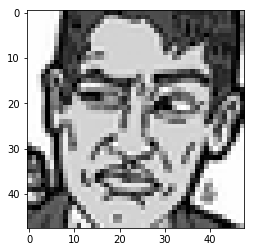

In [30]:
plt.imshow(im, cmap='gray')
plt.show()

In [25]:
model.save('model.h5')

In [26]:
model.save_weights('model_weights.h5')

In [27]:
pred = model.predict_classes(x_test1, batch_size=1)

3582/3589 [============================>.] - ETA: 0s

In [34]:
len(pred)

3589

In [28]:
pred[:100]

array([0, 0, 0, 6, 3, 3, 2, 4, 2, 2, 4, 0, 2, 2, 6, 2, 5, 5, 5, 3, 0, 5, 4,
       6, 6, 0, 4, 4, 0, 5, 3, 6, 3, 6, 0, 0, 2, 2, 4, 3, 0, 4, 3, 3, 6, 3,
       5, 3, 5, 6, 0, 3, 5, 2, 4, 3, 2, 4, 5, 3, 6, 3, 4, 3, 5, 3, 6, 6, 0,
       3, 4, 5, 6, 3, 2, 6, 5, 6, 6, 4, 0, 0, 0, 4, 5, 4, 3, 3, 5, 3, 6, 0,
       6, 0, 0, 0, 2, 3, 3, 0])

In [43]:
accu = model.evaluate(x_test1, y_test1, batch_size=128)

3584/3589 [============================>.] - ETA: 0s

In [44]:
accu

[1.8290669353402202, 0.58818612427690231]

In [51]:
accu2 = model.evaluate(x_test2, y_test2, batch_size=128)

3584/3589 [============================>.] - ETA: 0s

In [52]:
accu2

[1.7744717528209544, 0.59152967403711598]

In [58]:
im = np.array(x_test1[1], dtype=np.uint8)
im = im.reshape(48, 48)
print(y_test1[1])

[0 1 0 0 0 0 0]


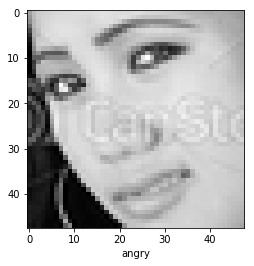

In [46]:
plt.imshow(im, cmap='gray')
plt.xlabel(emotion[pred[1]])
plt.show()

In [57]:
im = np.array(x_test1[2], dtype=np.uint8)
im = im.reshape(48, 48)
print(y_test1[2])

[0 0 0 0 1 0 0]


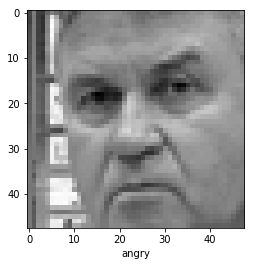

In [48]:
plt.imshow(im, cmap='gray')
plt.xlabel(emotion[pred[2]])
plt.show()

In [56]:
im = np.array(x_test1[3], dtype=np.uint8)
im = im.reshape(48, 48)
print(y_test1[3])

[0 0 0 0 0 0 1]


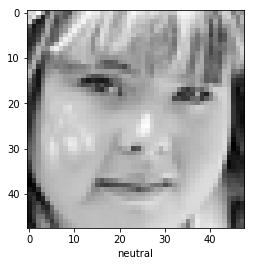

In [50]:
plt.imshow(im, cmap='gray')
plt.xlabel(emotion[pred[3]])
plt.show()

In [53]:
im = np.array(x_test1[4], dtype=np.uint8)
im = im.reshape(48, 48)

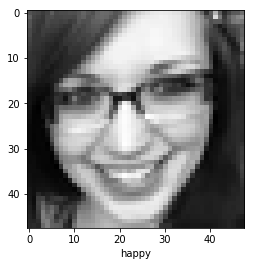

[0 0 0 1 0 0 0]


In [55]:
plt.imshow(im, cmap='gray')
plt.xlabel(emotion[pred[4]])
plt.show()
print(y_test1[4])